# FCC Book Recommendation K-NN (ML with Python Project)

## Project Summary

In [1]:
# In this challenge, you will create a book recommendation algorithm using 
#K-Nearest Neighbors.

# You will use the Book-Crossings dataset. This dataset contains 1.1 million 
#ratings (scale of 1-10) of 270,000 books by 90,000 users.

# The first three cells import libraries you may need and the data to use. The final cell is 
#for testing. Write all your code in between those cells.

## 1. Import Libraries

In [2]:
# 1. import libraries (you may add additional imports but you may not have to)

import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

## 2. Get Data Files

In [3]:
# 2. get data files

!wget -nc https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
# -nc  skip downloads that would download to existing files (overwriting them)
#!wget -h # help menu

!unzip -n book-crossings.zip
# -n  never overwrite existing files
#!unzip -h # help menu

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2022-12-20 18:59:05--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M  --.-KB/s    in 0.1s    

2022-12-20 18:59:05 (229 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [4]:
# ... INSERT YOUR CODE BELOW ...

## 3. Import CSV Data Into Dataframes

In [5]:
# 3. import csv data into dataframes

df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

## Get To Know Your Dataset

### Basic Info: ```df_books```

#### Information

In [6]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   isbn    271379 non-null  object
 1   title   271379 non-null  object
 2   author  271378 non-null  object
dtypes: object(3)
memory usage: 6.2+ MB


In [7]:
df_books.describe()

,isbn,title,author
count,271379,271379,271378
unique,271379,242154,102042
top,0195153448,Selected Poems,Agatha Christie
freq,1,27,632


In [8]:
df_books.head(3)

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este


In [9]:
df_books.tail(3)

,isbn,title,author
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker
271377,0192126040,Republic (World's Classics),Plato
271378,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle


In [10]:
df_books.shape

(271379, 3)

In [11]:
df_books.shape[0]

271379

In [12]:
df_books.ndim

2

In [13]:
df_books.size

814137

In [14]:
df_books.index

RangeIndex(start=0, stop=271379, step=1)

In [15]:
df_books.columns

Index(['isbn', 'title', 'author'], dtype='object')

In [16]:
df_books.isna().sum()

isbn      0
title     0
author    1
dtype: int64

In [17]:
df_books.notna().sum()

isbn      271379
title     271379
author    271378
dtype: int64

#### Plot

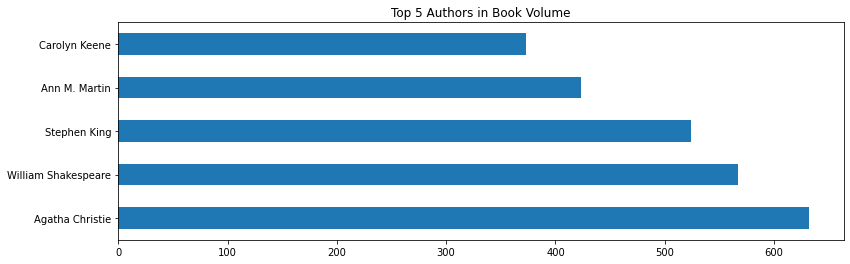

In [18]:
# Top 5 Authors in Number of Books
df_books['author'].value_counts().head(5).plot(kind='barh', figsize=(13,4), title='Top 5 Authors in Book Volume')

### Basic Info: ```df_ratings```

#### Information

In [19]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   user    1149780 non-null  int32  
 1   isbn    1149780 non-null  object 
 2   rating  1149780 non-null  float32
dtypes: float32(1), int32(1), object(1)
memory usage: 17.5+ MB


In [20]:
df_ratings.describe()

,user,rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [21]:
df_ratings.head(3)

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0


In [22]:
df_ratings.tail(3)

,user,isbn,rating
1149777,276709,0515107662,10.0
1149778,276721,0590442449,10.0
1149779,276723,05162443314,8.0


In [23]:
df_ratings.shape

(1149780, 3)

In [24]:
df_ratings.shape[0]

1149780

In [25]:
df_ratings.ndim

2

In [26]:
df_ratings.size

3449340

In [27]:
df_ratings.index

RangeIndex(start=0, stop=1149780, step=1)

In [28]:
df_ratings.columns

Index(['user', 'isbn', 'rating'], dtype='object')

In [29]:
df_ratings.isna().sum()

user      0
isbn      0
rating    0
dtype: int64

In [30]:
df_ratings.notna().sum()

user      1149780
isbn      1149780
rating    1149780
dtype: int64

In [31]:
# How many unique users, books and ratings?

print("{} unique users".format(df_ratings.user.value_counts().count())) # 105283 unique users
print("{} unique books".format(df_ratings.isbn.value_counts().count())) # 340556 unique books
print("{} unique ratings".format(df_ratings.rating.value_counts().count())) # 11 unique ratings (0-10)

105283 unique users
340556 unique books
11 unique ratings


#### Plot

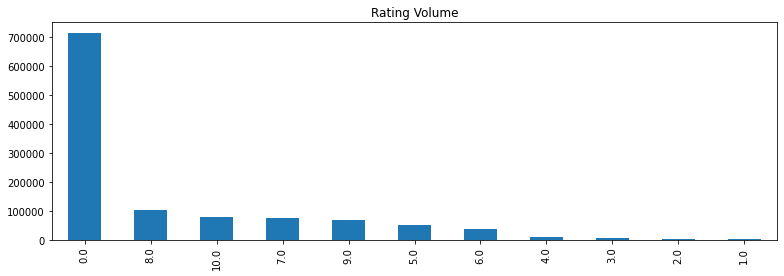

In [32]:
# Rating Volume
df_ratings['rating'].value_counts().plot(kind='bar', figsize=(13,4), title='Rating Volume')

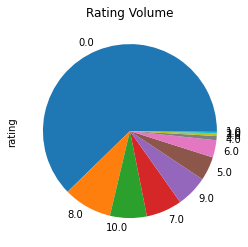

In [33]:
df_ratings['rating'].value_counts().plot(kind='pie', figsize=(13,4), title='Rating Volume')

In [34]:
mask1 = df_ratings['rating'] > 0

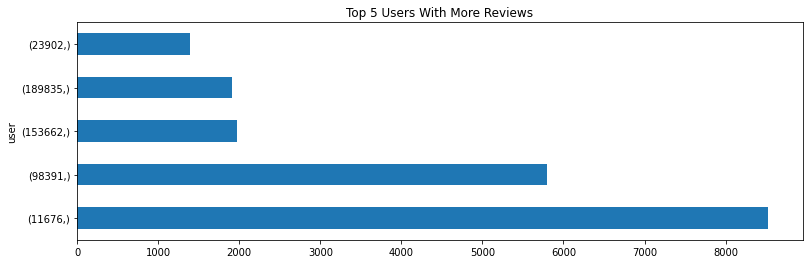

In [35]:
# top 5 USERS with more reviews
df_ratings.loc[mask1, ['user']].value_counts().head(5).plot(kind='barh', figsize=(13,4), title='top 5 users with more reviews'.title())

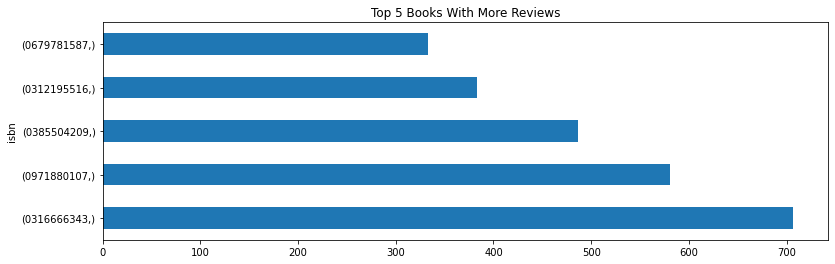

In [36]:
# top 5 BOOKS with more reviews
df_ratings.loc[mask1, ['isbn']].value_counts().head(5).plot(kind='barh', figsize=(13,4), title='top 5 books with more reviews'.title())

## 4. Clean The Data

### Pre-Cleaning / Auxiliary Function

In [37]:
# Create dataframes for cleaning

df_books_clean = df_books.copy()
df_ratings_clean = df_ratings.copy()

In [38]:
# Validate 10-digit isbn (check if is mathematically valid)

def validate_ten_digit_isbn(isbn):
  isbn_str = str(isbn)
  has_10_chars = len(isbn_str) == 10
  if not has_10_chars: return False
  first_9_chars_are_digit = all(str.isdigit(char) for char in isbn_str[:9])
  if not first_9_chars_are_digit: return False
  last_char_is_digit_or_X = str.isdigit(isbn_str[-1]) or isbn_str[-1] == 'X'
  if not last_char_is_digit_or_X: return False
  pos = 10
  sum = 0
  for char in isbn_str:
    if str.isdigit(char):
      sum += ( int(char) * pos )
    elif char == 'X':
      sum += ( 10 * pos )
    pos -= 1
  if sum % 11 == 0: return True # ISBN valid
  else: return False # ISBN invalid

#ISBN = isbn_values_clean.to_list()[0] # 0061009059
#ISBN = '0061009059'
#ISBN_X = '034538475X'
#validate_ten_digit_isbn(ISBN_X)

### Cleaning ```df_books``` in ```df_books_clean```

In [39]:
df_books_clean.head(3)

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este


In [40]:
# 4. Clean the data

# Filter invalid ISBN
mask_filter_invalid_isbn = df_books_clean.isbn.map(validate_ten_digit_isbn)
df_books_clean = df_books_clean[ mask_filter_invalid_isbn ]

# Replace "&amp;" for "&" (ampersand)
df_books_clean['title'] = df_books_clean['title'].str.replace('&amp;', '&')
df_books_clean['author'] = df_books_clean['author'].str.replace('&amp;', '&')

df_books_clean.shape

(270850, 3)

### Cleaning ```df_ratings``` in ```df_ratings_clean```

In [41]:
df_ratings_clean.head(3)

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0


In [42]:
# TIP: If you graph the dataset (optional), you will notice that most books are not rated frequently. 
#To ensure statistical significance, remove from the dataset users with less than 200 ratings 
#and books with less than 100 ratings.

Top 10 Rating by user
0.0     716109
8.0     103736
10.0     78610
7.0      76457
9.0      67541
5.0      50974
6.0      36924
4.0       8904
3.0       5996
2.0       2759
Name: rating, dtype: int64


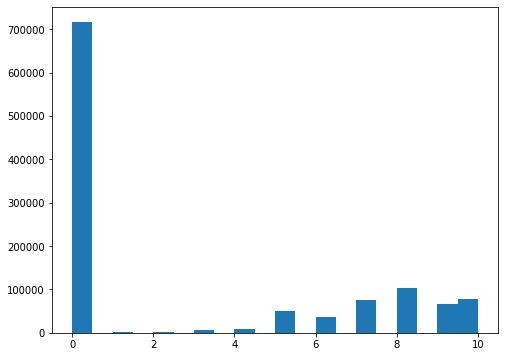

In [43]:
print("Top 10 Rating by user")
print(df_ratings["rating"].value_counts().head(10))

#Total rating distribution
plt.figure(figsize=(8,6))
g = plt.hist(df_ratings["rating"], bins=20)

In [44]:
# 4. Clean the data

# 4.1. Filter Users with < 200 ratings

user_ratings_counts = df_ratings.groupby(by=['user'])['rating'].count().to_frame().sort_values(['rating'], ascending=False)
mask_users_more = user_ratings_counts['rating'] >= 200
user_ratings_counts_200 = user_ratings_counts[mask_users_more]
users_to_keep = user_ratings_counts_200.index.to_list()
mask = df_ratings['user'].isin(users_to_keep)
df_ratings_clean = df_ratings[ mask ]


# 4.2. Filter Books with < 100 ratings

book_ratings_counts = df_ratings.groupby(by=['isbn'])['rating'].count().to_frame().sort_values(['rating'], ascending=False)
mask_books_more = book_ratings_counts['rating'] >= 100
book_ratings_counts_100 = book_ratings_counts[mask_books_more]
books_to_keep = book_ratings_counts_100.index.to_list()
mask = df_ratings_clean['isbn'].isin(books_to_keep)
df_ratings_clean = df_ratings_clean[ mask ]


# 4.3. Filter invalid ISBN

mask_filter_invalid_isbn = df_ratings_clean.isbn.map(validate_ten_digit_isbn)
df_ratings_clean = df_ratings_clean[ mask_filter_invalid_isbn ]


df_ratings_clean.shape

(49781, 3)

### Creating An Unique And Cleaned Data Set

In [45]:
# create copy of both cleaned dataframes
df1_books = df_books_clean.copy()
df2_ratings = df_ratings_clean.copy()

# set 'isbn' as index in ratings
df2_ratings = df2_ratings.set_index('isbn').sort_index(ascending=True)

# set 'isbn' as index in books as well, and conform this index to the ratings index
# ( let books index (bigger) adapt to/get absorbed by ratings index (shorter) )
df1_books = df1_books.set_index('isbn').reindex(df2_ratings.index).sort_index(ascending=True)

# create unique dataframe, add 'title' and 'author' columns
df_clean = df2_ratings.copy()
df_clean['title'] = df1_books['title']
df_clean['author'] = df1_books['author']

# drop missing values (NaN)
df_clean = df_clean.dropna(axis='index', how='any')

## 5. Use K-Nearest Neighbors (KNN) Algorithm

### Auxiliar Functions

In [46]:
def get_book(isbn):
  mask = df_books_clean['isbn'] == isbn
  book = df_books_clean[ mask ]
  if book.shape[0] == 0: return False
  return book
#get_book('0061009059')

In [47]:
def get_book_values(isbn):
  book = get_book(isbn)
  if book is False: return False
  return book.values[0]
#get_book_values('0061009059')

In [48]:
def get_book_by_title(title, dataframe):
  mask = dataframe['title'] == title
  books = dataframe[ mask ]
  if books.shape[0] == 0: return False
  return books
#get_book_by_title('The Queen of the Damned (Vampire Chronicles (Paperback))', df_clean)

In [49]:
def get_isbn_by_book_title(title, dataframe):
  books = get_book_by_title(title, dataframe)
  if books.shape[0] == 0: return False
  return books.index.unique()[0]
#get_isbn_by_book_title('The Queen of the Damned (Vampire Chronicles (Paperback))', df_clean)

### K-NN Model Implementation

In [50]:
# 5. After importing and cleaning the data, use NearestNeighbors from sklearn.neighbors 
#to develop a model that shows books that are similar to a given book. The Nearest 
#Neighbors algorithm measures the distance to determine the “closeness” of instances.

#### 'Pivot' DataFrame And Convert To Scipy Sparse Matrix

In [51]:
# create dataframe of book features:

features = df_clean.reset_index().pivot(
    index='isbn',
    columns='user',
    values='rating').fillna(0)

features

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573227331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# convert dataframe of book features into scipy csr matrix
#(compressed sparse row matrix)

matrix_book_features = csr_matrix(features.values)
matrix_book_features

<727x888 sparse matrix of type '<class 'numpy.float32'>'
	with 12548 stored elements in Compressed Sparse Row format>

In [53]:
# create books values array (to become easier to access by index)

books_values = pd.Series(features.index).map(get_book_values)
books_values.to_numpy()[:5]

array([array(['002542730X',
              'Politically Correct Bedtime Stories: Modern Tales for Our Life and Times',
              'James Finn Garner'], dtype=object)                                        ,
       array(['0060008032', 'Angels', 'Marian Keyes'], dtype=object),
       array(['0060096195', 'The Boy Next Door', 'Meggin Cabot'], dtype=object),
       array(['006016848X',
              'Men Are from Mars, Women Are from Venus: A Practical Guide for Improving Communication and Getting What You Want in Your Relationships',
              'John Gray'], dtype=object)                                                                                                              ,
       array(['0060173289', 'Divine Secrets of the Ya-Ya Sisterhood : A Novel',
              'Rebecca Wells'], dtype=object)                                  ],
      dtype=object)

In [54]:
# set K value
K = 5

# create NearestNeighbors model
knn = NearestNeighbors(
    metric='cosine',
    algorithm='brute',
    n_neighbors=K,
    n_jobs=-1)

# fit the model to the features matrix
knn.fit(matrix_book_features)

knn

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1)

## 6. Create A Function Named ```get_recommends```

In [55]:
# 6. Create a function named get_recommends that takes a book title (from the dataset) 
#as an argument and returns a list of 5 similar books with their distances from the 
#book argument.

# Notice that the data returned from get_recommends() is a list. The first element in the
# list is the book title passed into the function. The second element in the list is a list 
#of five more lists. Each of the five lists contains a recommended book and the distance from 
#the recommended book to the book passed into the function.

# This code:
# get_recommends("The Queen of the Damned (Vampire Chronicles (Paperback))")

# should return:
#[
#  'The Queen of the Damned (Vampire Chronicles (Paperback))',
#  [
#    ['Catch 22', 0.793983519077301], 
#    ['The Witching Hour (Lives of the Mayfair Witches)', 0.7448656558990479], 
#    ['Interview with the Vampire', 0.7345068454742432],
#    ['The Tale of the Body Thief (Vampire Chronicles (Paperback))', 0.5376338362693787],
#    ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.5178412199020386]
#  ]
#]

# function to return recommended books - this will be tested
#def get_recommends(book = ""):
#
#  recommended_books=''
#  return recommended_books

In [56]:
def get_recommends(book = '', n_top_recommends=5):

  # get queried book values: isbn, index, title, author
  title = book[:]
  book_isbn = get_isbn_by_book_title(title, df_clean)
  book_index = np.where( features.index.to_numpy() == book_isbn )[0][0]
  book_title = books_values[book_index][1]
  book_author = books_values[book_index][2]
  
  # get the query point - of shape (n_queries, n_features) - from the book features matrix
  X = matrix_book_features[book_index]

  # get distances and indices of the K nearest neighbors
  distances, indices = knn.kneighbors(X=X, n_neighbors=n_top_recommends+1, return_distance=True)

  # create complete list of recommended books
  recommended_books = [ book_title, [] ]
  for i in range( len(distances.tolist()[0]) ):
    rec_distance = distances.tolist()[0][i]
    rec_index = indices.flat[i]
    rec_title = books_values[rec_index][1]
    recommended_books[1].append( [ rec_title, rec_distance ] )

  # sort list by distance (descending)
  recommended_books[1].sort(reverse=True, key=lambda x: x[1])

  # pop (remove) last recommended book (which is the queried book itself)
  recommended_books[1].pop()

  return recommended_books

get_recommends(book='The Queen of the Damned (Vampire Chronicles (Paperback))', n_top_recommends=5)

['The Queen of the Damned (Vampire Chronicles (Paperback))',
 [['Catch 22', 0.793983519077301],
  ['The Witching Hour (Lives of the Mayfair Witches)', 0.7448656558990479],
  ['Interview with the Vampire', 0.7345068454742432],
  ['The Tale of the Body Thief (Vampire Chronicles (Paperback))',
   0.5376338362693787],
  ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.5178412199020386]]]

In [57]:
# ... INSERT YOUR CODE ABOVE ...

## 7. Test Your Code

In [58]:
# 7. test your code

books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2): 
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [["I'll Be Seeing You", 0.8016210794448853], ['The Weight of Water', 0.7708583474159241], ['The Surgeon', 0.7699410915374756], ['I Know This Much Is True', 0.7677075266838074], ['The Lovely Bones: A Novel', 0.7234864234924316]]]
You passed the challenge! 🎉🎉🎉🎉🎉
